# UCK 358E – Introduction to Artificial Intelligence 
## Homework 2
## Deadline: May 12, 2024




#### Name: Ecem Sengel
#### Student Number: 110200149

### In this homework, you will focus on predicting type of trees in a forest. There are 7 different tree types in the dataset, the label is named as "Cover_Type" and you will train models to predict the correct type for the test data. Each section below contains clear explanations about the tasks. It is not required to write a separate report for the homework. Make all of your explanations and discussions inside the Jupiter Notebook. Use the Notebook as your report. Be aware that If you deliver a Notebook containing only codes without explanation and discussion, you will lose majority of your points. 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## import any library that you will use
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model, losses
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, Model


# Load Data (don't change anything in this part, just run it) 

In [95]:
df = pd.read_csv("datasetHW.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [96]:
df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

In [5]:
X_train

,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
765,2916,202,67,1507
5927,2356,247,210,1050
14032,2977,195,696,878
6187,2415,131,108,638
3872,2299,167,497,1159
...,...,...,...,...
5191,2189,254,0,525
13418,2317,229,0,560
5390,2962,237,95,470
860,2898,204,30,1552


In [97]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
filter_col.extend(["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points"])
df2 = df.loc[(df['Cover_Type'] == 1) | (df['Cover_Type'] == 3) ]
X2 = df2[filter_col]
y2 = df2[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

In [7]:
X_train2

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
2701,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2047,89,228,42
2056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3341,184,424,1809
7093,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2651,217,470,1124
5778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3114,180,474,3206
10341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3164,226,150,1262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2081,244,175,488
1799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3241,217,0,2012
11119,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2510,228,319,180
13509,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2401,146,210,569


In [8]:
y_train2

,Cover_Type
2701,3
2056,1
7093,3
5778,1
10341,1
...,...
12092,3
1799,1
11119,3
13509,3


## <font color='red'>  In part a and part b, use (X_train, y_train) for training and (X_test, y_test) for testing your model. Don't use (X_test, y_test) during training or validation. </font>

## <font color='red'> In part c, use (X_train2) for training and (X_test2, y_test2) for testing your model. X_train2 contains both continues and categorical features. </font>

## Part a) Train SVM model with the first training set (X_train). Try to figure out whether there is overfitting or underfitting. Define the required preprocesses and feature engineering approaches to obtain the best accuracy for the test set (X_test). Plot confusion matrix, present your results and discuss your findings. (You are free to use sklearn in this part) 

Fisrtly I checked the data I am going to use:

In [9]:
y_train

,Cover_Type
765,2
5927,3
14032,2
6187,6
3872,3
...,...
5191,4
13418,4
5390,2
860,5


In [10]:
unique_values = y_train['Cover_Type'].unique()
print("Unique values:", unique_values)

Unique values: [2 3 6 4 1 5 7]


In [11]:
training_data = X_train.copy()
training_data = X_train.join(y_train)

A pairplot is created to see if the data is classified homogenously or not to decide if it is easy to classify or not.

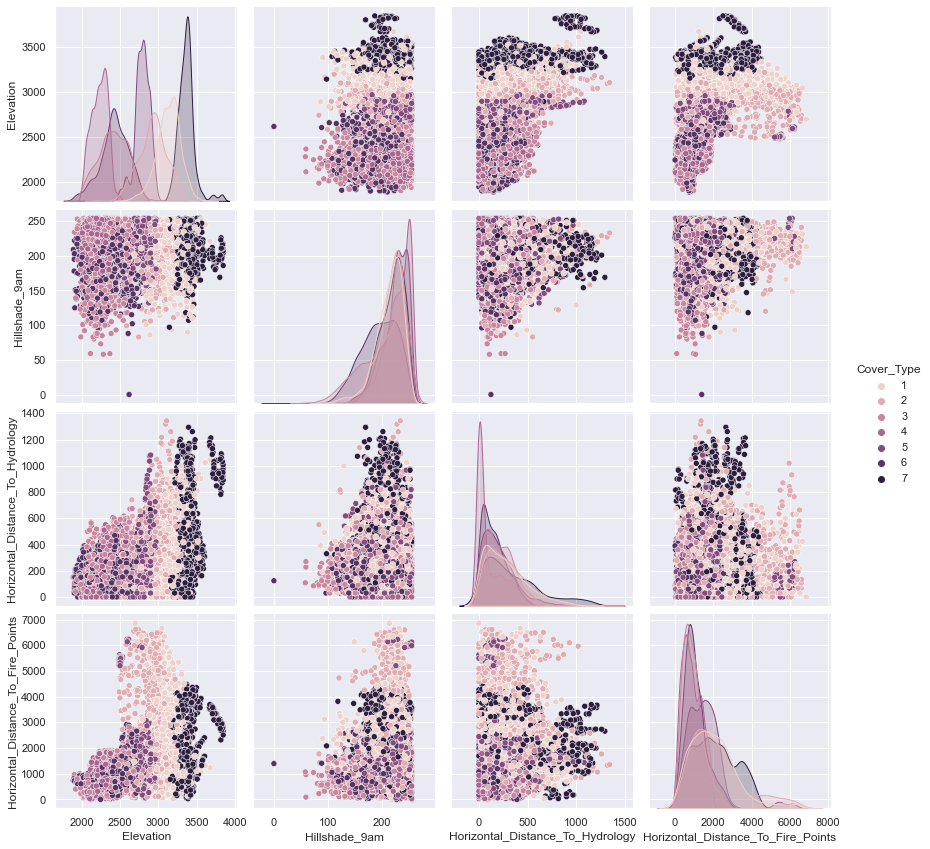

In [12]:
sns.pairplot(training_data, hue='Cover_Type', height=3)

Firstly the model is created with completely the default values. They can be listed as:

C=1.0

kernel='rbf'

degree=3

gamma='scale' 

coef0=0.0

shrinking=True

probability=False

tol=0.001 

cache_size=200 

class_weight=None

verbose=False

max_iter=-1

decision_function_shape='ovr' 

break_ties=False

random_state=None

Model is created and the test accuracy is checked below:

In [14]:
# SVM model is created
svm_default = SVC(random_state = 42)
# Training the model with proper data given
svm_default.fit(X_train,y_train)
# Making predictions for test data
predictions = svm_default.predict(X_test)
# Getting model accuracy by comparing the predictions with the actual classes
print("print accuracy of svm algo: ",svm_default.score(X_test,y_test))

c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


print accuracy of svm algo:  0.6276455026455027


To see in which classes mistakes are more made, a confusion matrix is created.

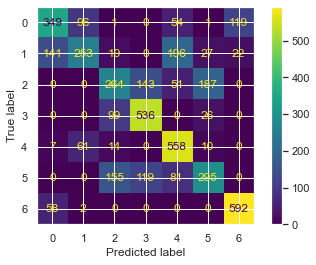

In [15]:
c_m = confusion_matrix(y_test,predictions , sample_weight=None, normalize=None)
disp =ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels=None)
disp.plot()
plt.show()

Here as can be seen, classes 1, 2, 3, and 4 are the most mistaken ones. We can already see that these groups are more mixed together in the pairplot, this was an expected situation.

Finally to make model more accurate for classfying the given data some improvements have tried and shared below:

- kernel='precomputed' coludn't used since input ('X_train', 'X_test') is not a square matrix, after 'sigmoid' accuracy is 0.0008818342151675485, with kerel = 'poly' accuracy is increased a bit, finally with linear kernel accuracy rate is decreased a bit. 'poly' is chosen as the best kernel sinece the data is a little complex for a linear linear to split, poliynomials are better to split the data for classification
 

- degree = 3 was the default value, I raised to make more accurate predictions. 'degree' parameter is only usable for 'poly' kernel, so degree change is checked only for this kernel. 

In [16]:
svm_v1 = SVC(random_state = 42, kernel='poly', degree = 10)

In [17]:
svm_v1.fit(X_train,y_train)
print("print accuracy of svm algo: ",svm_v1.score(X_test,y_test))

c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


print accuracy of svm algo:  0.6408730158730159


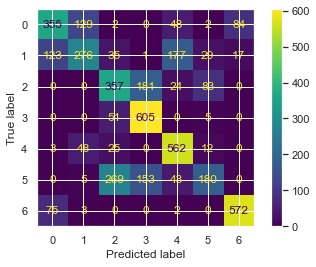

In [18]:
predictions_2 = svm_v1.predict(X_test)
c_m = confusion_matrix(y_test,predictions_2 , sample_weight=None, normalize=None)
disp =ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels=None)
disp.plot()
plt.show()

- Analyzing the decision_function_shape effect

In [19]:
svm_v2 = SVC(random_state = 42, kernel='poly', degree = 10,decision_function_shape='ovo' )
svm_v2.fit(X_train,y_train)

c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(decision_function_shape='ovo', degree=10, kernel='poly', random_state=42)

In [20]:
print("print accuracy of svm algo: ",svm_v2.score(X_test,y_test))

print accuracy of svm algo:  0.6408730158730159


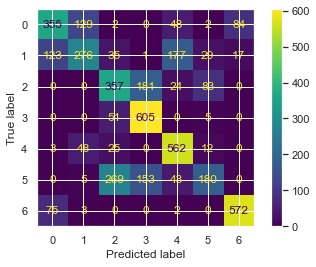

In [21]:
predictions_3 = svm_v2.predict(X_test)
c_m = confusion_matrix(y_test,predictions_3, sample_weight=None, normalize=None)
disp =ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels=None)
disp.plot()
plt.show()

Finally kernel='poly', degree = 10,decision_function_shape='ovo' are assumed as the best choices for SVM model, the higest accuracy I reached is 64.087 %.

## Part b) Train NN models with the first training set (X_train). You will train NN models with different architectures. 

### b1) Train a NN model with a small network and train another one using a bigger network that contains at least 3 hidden layers. Try to figure out whether there is overfitting or underfitting. Define the required preprocesses and feature engineering approaches to obtain the best accuracy with the second model for the test set (X_test). Plot confusion matrix, present your results and discuss your findings. (You are free to use keras in part b1, don't use sklearn for NN training) 


In [22]:
X_train.shape

(10584, 4)

A model is created with 3 hidden layers, 1 input and 1 output layers. All the acctivation functions and the sizes of the layers are shown in the code below.

In [23]:
nn_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[ 4]),
                                       tf.keras.layers.Dense(512, activation = 'relu'),
                                       tf.keras.layers.Dense(128, activation = 'relu'),
                                       tf.keras.layers.Dense(86, activation = 'relu'),
                                       tf.keras.layers.Dense(64, activation = 'relu'),
                                       tf.keras.layers.Dense(7, activation = 'softmax')])

Optimizer Function Tryings: 
Adam ----> 66-68
Ftrl ----> 42-43
Nadam ---> 68
Adamax --> 66
Adagrad -> 45
Adadelta > 40
RMSprop -> 62
SGD -----> 14.5

Decided to use Nadam as an optizer 

In [24]:
nn_model.compile(optimizer = 'Nadam', 
                 loss = 'sparse_categorical_crossentropy', 
                 metrics = ['accuracy'])
y_train_scaled = y_train - 1
history = nn_model.fit(X_train, y_train_scaled,epochs= 200)

Epoch 1/200
331/331 [==============================] - 3s 3ms/step - loss: 3.8016 - accuracy: 0.2516
Epoch 2/200
331/331 [==============================] - 1s 3ms/step - loss: 1.7046 - accuracy: 0.3227
Epoch 3/200
331/331 [==============================] - 1s 3ms/step - loss: 1.5736 - accuracy: 0.3512
Epoch 4/200
331/331 [==============================] - 1s 2ms/step - loss: 1.4983 - accuracy: 0.3739
Epoch 5/200
331/331 [==============================] - 1s 2ms/step - loss: 1.4679 - accuracy: 0.3860
Epoch 6/200
331/331 [==============================] - 1s 2ms/step - loss: 1.4277 - accuracy: 0.3940
Epoch 7/200
331/331 [==============================] - 1s 2ms/step - loss: 1.4126 - accuracy: 0.4029
Epoch 8/200
331/331 [==============================] - 1s 2ms/step - loss: 1.4001 - accuracy: 0.4049
Epoch 9/200
331/331 [==============================] - 1s 2ms/step - loss: 1.3926 - accuracy: 0.4126
Epoch 10/200
331/331 [==============================] - 1s 2ms/step - loss: 1.3866 - accura

Deciding how many epochs are sufficient to increase the accuracy

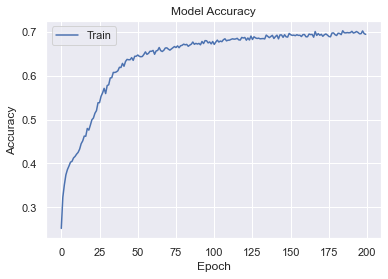

In [25]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()

Updating the epoch number according to that plot, around 150 epoch number would be enough for under all of the conditions remain the same:

In [26]:
nn_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[ 4]),
                                       tf.keras.layers.Dense(512, activation = 'relu'),
                                       tf.keras.layers.Dense(128, activation = 'relu'),
                                       tf.keras.layers.Dense(128, activation = 'relu'),
                                       tf.keras.layers.Dense(86, activation = 'relu'),
                                       
                                       tf.keras.layers.Dense(7, activation = 'softmax')])
nn_model.compile(optimizer = 'Nadam', 
                 loss = 'sparse_categorical_crossentropy', 
                 metrics = ['accuracy'])
history = nn_model.fit(X_train, y_train_scaled,epochs= 150)

Epoch 1/150
331/331 [==============================] - 2s 2ms/step - loss: 4.6509 - accuracy: 0.2437
Epoch 2/150
331/331 [==============================] - 1s 2ms/step - loss: 1.7801 - accuracy: 0.3185
Epoch 3/150
331/331 [==============================] - 1s 2ms/step - loss: 1.5983 - accuracy: 0.3444
Epoch 4/150
331/331 [==============================] - 1s 2ms/step - loss: 1.5092 - accuracy: 0.3695
Epoch 5/150
331/331 [==============================] - 1s 2ms/step - loss: 1.4871 - accuracy: 0.3671
Epoch 6/150
331/331 [==============================] - 1s 2ms/step - loss: 1.4556 - accuracy: 0.3856
Epoch 7/150
331/331 [==============================] - 1s 2ms/step - loss: 1.4328 - accuracy: 0.3924
Epoch 8/150
331/331 [==============================] - 1s 2ms/step - loss: 1.4128 - accuracy: 0.4000
Epoch 9/150
331/331 [==============================] - 1s 3ms/step - loss: 1.4455 - accuracy: 0.3854
Epoch 10/150
331/331 [==============================] - 1s 3ms/step - loss: 1.4076 - accura

In [27]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 512)               2560      
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 86)                11094     
                                                                 
 dense_10 (Dense)            (None, 7)                 609       
                                                                 
Total params: 96439 (376.71 KB)
Trainable params: 9643

In [28]:
predicitons = nn_model.predict(X_test)
predicted_classes = predicitons.argmax(-1)
y_test_scaled = y_test -1
cm = tf.math.confusion_matrix(y_test_scaled, predicted_classes)

142/142 [==============================] - 0s 1ms/step


The test and training accuracies are printed out to check if there are any overfitting.

In [29]:
loss, accuracy = nn_model.evaluate(X_test, y_test_scaled)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

142/142 [==============================] - 0s 986us/step - loss: 0.7107 - accuracy: 0.7050
Test Loss: 0.7107259035110474
Test Accuracy: 0.7050264477729797


Finally the confusion matrix is plotted. It can be seen that here the model can classfy the data much more accurately than the SVM model tried before.

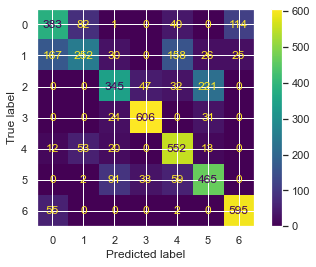

In [30]:
cm_np = cm.numpy()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_np, display_labels=None)
disp.plot()
plt.show()

By changing the parameters of the written NN model, the highest accuracy I got is around 68%.

### b2) Use the second architecture (which contains at least 3 hidden layers) and the preprocess that you defined in part b1, and train this neural network by developing your NN training algorithm from scratch without using any library. Compare your results with b1. (You can benefit from the codes available in ninova)


Multi Layer Neural Network From Scratch:

- Firstly all of the supportive functions are written:

In [67]:
class MultiplyGate:
    def forward(self,W, X):
        return np.dot(X, W)

    def backward(self, W, X, dZ):
        dW = np.dot(np.transpose(X), dZ)
        dX = np.dot(dZ, np.transpose(W))
        return dW, dX

class AddGate:
    def forward(self, X, b):
        return X + b

    def backward(self, X, b, dZ):
        dX = dZ * np.ones_like(X)
        db = np.dot(np.ones((1, dZ.shape[0]), dtype=np.float64), dZ)
        return db, dX

class Sigmoid:
    def forward(self, X):
        return 1.0 / (1.0 + np.exp(-X))

    def backward(self, X, top_diff):
        output = self.forward(X)
        return (1.0 - output) * output * top_diff

class Tanh:
    def forward(self, X):
        return np.tanh(X)

    def backward(self, X, top_diff):
        output = self.forward(X)
        return (1.0 - np.square(output)) * top_diff

class Softmax:
    def predict(self, X):
        exp_scores = np.exp(X)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def loss(self, X, y):
        num_examples = X.shape[0]
        probs = self.predict(X)
        corect_logprobs = -np.log(probs[range(num_examples), y])
        data_loss = np.sum(corect_logprobs)
        return 1./num_examples * data_loss

    def diff(self, X, y):
        num_examples = X.shape[0]
        probs = self.predict(X)
        probs[range(num_examples), y] -= 1
        return probs


- Secondly the main part, Neural Network algorithm is written

with basic gradient descent optimizer:

In [72]:
class Model:
    def __init__(self, layers_dim):
        self.b = []
        self.W = []
        self.losses = []  # List to store loss values during training
        for i in range(len(layers_dim)-1):
            self.W.append(np.random.randn(layers_dim[i], layers_dim[i+1]) / np.sqrt(layers_dim[i]))
            self.b.append(np.random.randn(layers_dim[i+1]).reshape(1, layers_dim[i+1]))

    def calculate_loss(self, X, y):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        input = X
        for i in range(len(self.W)):
            mul = mulGate.forward(self.W[i], input)
            add = addGate.forward(mul, self.b[i])
            input = layer.forward(add)

        return softmaxOutput.loss(input, y)

    def predict(self, X):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        input = X
        for i in range(len(self.W)):
            mul = mulGate.forward(self.W[i], input)
            add = addGate.forward(mul, self.b[i])
            input = layer.forward(add)

        probs = softmaxOutput.predict(input)
        return np.argmax(probs, axis=1)

    def train(self, X, y, num_passes=20000, epsilon=0.01, reg_lambda=0.01, print_loss=False):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        batch_size = 2  # Set batch size
        num_batches = len(X) // batch_size  # Calculate number of batches
        
        for epoch in range(num_passes):
            epoch_loss = 0
            
            # Shuffle training data for each epoch
            X_shuffled, y_shuffled = shuffle(X, y, random_state=epoch)
            
            for batch in range(num_batches):
                # Extract current batch
                X_batch = X_shuffled[batch*batch_size:(batch+1)*batch_size]
                y_batch = y_shuffled[batch*batch_size:(batch+1)*batch_size]

                # Forward propagation
                input = X_batch
                forward = [(None, None, input)]
                for i in range(len(self.W)):
                    mul = mulGate.forward(self.W[i], input)
                    add = addGate.forward(mul, self.b[i])
                    input = layer.forward(add)
                    forward.append((mul, add, input))

                # Calculate and accumulate loss for the current batch
                loss = self.calculate_loss(X_batch, y_batch)
                epoch_loss += loss

                # Back propagation
                dtanh = softmaxOutput.diff(forward[len(forward)-1][2], y_batch)
                for i in range(len(forward)-1, 0, -1):
                    dadd = layer.backward(forward[i][1], dtanh)
                    db, dmul = addGate.backward(forward[i][0], self.b[i-1], dadd)
                    dW, dtanh = mulGate.backward(self.W[i-1], forward[i-1][2], dmul)
                    # Add regularization terms (b1 and b2 don't have regularization terms)
                    dW += reg_lambda * self.W[i-1]
                    # Gradient descent parameter update
                    self.b[i-1] += -epsilon * db
                    self.W[i-1] += -epsilon * dW

            # Calculate average loss for the epoch
            avg_epoch_loss = epoch_loss / num_batches
            self.losses.append(avg_epoch_loss)

            if print_loss and epoch % 1000 == 0:
                print("Loss after epoch %i: %f" % (epoch, avg_epoch_loss))


- Finally the created model is using for fitting the data and making predictions for X_test data:

Loss after epoch 0: 3.895281


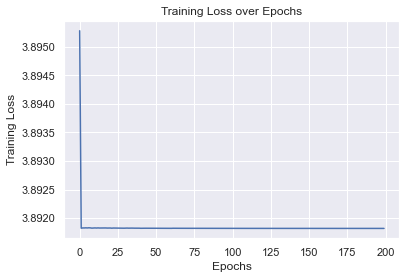

Accuracy: 0.14329805996472664


In [73]:
# Create model
layers_dim = [X_train.shape[1], 128, 64, 32, 7]
model = Model(layers_dim)

# Train model
model.train(np.array(X_train), np.array(y_train - 1), num_passes=200, epsilon=0.01, reg_lambda=0.01, print_loss=True)

# Plot training loss
plt.plot(range(len(model.losses)), model.losses)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()


# Predict y_test
y_pred = model.predict(np.array(X_test))

# Calculate accuracy
accuracy = accuracy_score(y_test - 1, y_pred)  # Subtract 1 from y_test since my model outputs 0-indexed classes
print("Accuracy:", accuracy)

Adam optimizer is tried to be written for the optimizer to increase the accuracy:

In [74]:
class Model:
    def __init__(self, layers_dim):
        self.b = []
        self.W = []
        self.losses = []  # List to store loss values during training
        for i in range(len(layers_dim)-1):
            self.W.append(np.random.randn(layers_dim[i], layers_dim[i+1]) / np.sqrt(layers_dim[i]))
            self.b.append(np.random.randn(layers_dim[i+1]).reshape(1, layers_dim[i+1]))

    def calculate_loss(self, X, y):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        input = X
        for i in range(len(self.W)):
            mul = mulGate.forward(self.W[i], input)
            add = addGate.forward(mul, self.b[i])
            input = layer.forward(add)

        return softmaxOutput.loss(input, y)

    def predict(self, X):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        input = X
        for i in range(len(self.W)):
            mul = mulGate.forward(self.W[i], input)
            add = addGate.forward(mul, self.b[i])
            input = layer.forward(add)

        probs = softmaxOutput.predict(input)
        return np.argmax(probs, axis=1)

    def train(self, X, y, num_passes=20000, epsilon=0.01, reg_lambda=0.01, print_loss=False):
        mulGate = MultiplyGate()
        addGate = AddGate()
        layer = Tanh()
        softmaxOutput = Softmax()

        batch_size = 2  # Set batch size
        num_batches = len(X) // batch_size  # Calculate number of batches
        
        # Initialize Adam optimizer parameters
        beta1 = 0.9
        beta2 = 0.999
        eps = 1e-8
        m_W = [np.zeros_like(w) for w in self.W]
        v_W = [np.zeros_like(w) for w in self.W]
        m_b = [np.zeros_like(b) for b in self.b]
        v_b = [np.zeros_like(b) for b in self.b]
        t = 0
        
        for epoch in range(num_passes):
            epoch_loss = 0
            
            # Shuffle training data for each epoch
            X_shuffled, y_shuffled = shuffle(X, y, random_state=epoch)
            
            for batch in range(num_batches):
                # Extract current batch
                X_batch = X_shuffled[batch*batch_size:(batch+1)*batch_size]
                y_batch = y_shuffled[batch*batch_size:(batch+1)*batch_size]

                # Forward propagation
                input = X_batch
                forward = [(None, None, input)]
                for i in range(len(self.W)):
                    mul = mulGate.forward(self.W[i], input)
                    add = addGate.forward(mul, self.b[i])
                    input = layer.forward(add)
                    forward.append((mul, add, input))

                # Calculate and accumulate loss for the current batch
                loss = self.calculate_loss(X_batch, y_batch)
                epoch_loss += loss

                # Back propagation
                dtanh = softmaxOutput.diff(forward[len(forward)-1][2], y_batch)
                for i in range(len(forward)-1, 0, -1):
                    dadd = layer.backward(forward[i][1], dtanh)
                    db, dmul = addGate.backward(forward[i][0], self.b[i-1], dadd)
                    dW, dtanh = mulGate.backward(self.W[i-1], forward[i-1][2], dmul)
                    # Add regularization terms (b1 and b2 don't have regularization terms)
                    dW += reg_lambda * self.W[i-1]
                    
                    # Update Adam parameters
                    t += 1
                    m_W[i-1] = beta1 * m_W[i-1] + (1 - beta1) * dW
                    v_W[i-1] = beta2 * v_W[i-1] + (1 - beta2) * (dW ** 2)
                    m_b[i-1] = beta1 * m_b[i-1] + (1 - beta1) * db
                    v_b[i-1] = beta2 * v_b[i-1] + (1 - beta2) * (db ** 2)
                    
                    # Bias correction
                    m_W_hat = m_W[i-1] / (1 - beta1 ** t)
                    v_W_hat = v_W[i-1] / (1 - beta2 ** t)
                    m_b_hat = m_b[i-1] / (1 - beta1 ** t)
                    v_b_hat = v_b[i-1] / (1 - beta2 ** t)
                    
                    # Update parameters
                    self.W[i-1] -= epsilon * m_W_hat / (np.sqrt(v_W_hat) + eps)
                    self.b[i-1] -= epsilon * m_b_hat / (np.sqrt(v_b_hat) + eps)

            # Calculate average loss for the epoch
            avg_epoch_loss = epoch_loss / num_batches
            self.losses.append(avg_epoch_loss)

            if print_loss and epoch % 1000 == 0:
                print("Loss after epoch %i: %f" % (epoch, avg_epoch_loss))

Loss after epoch 0: 3.901876


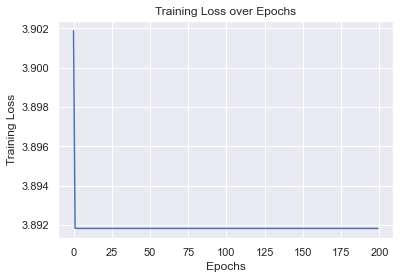

Accuracy: 0.13668430335097


In [75]:
# Create model
layers_dim = [X_train.shape[1], 128, 64, 32, 7]
model = Model(layers_dim)

# Train model
model.train(np.array(X_train), np.array(y_train - 1), num_passes=200, epsilon=0.01, reg_lambda=0.01, print_loss=True)

# Plot training loss
plt.plot(range(len(model.losses)), model.losses)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()


# Predict y_test
y_pred = model.predict(np.array(X_test))

# Calculate accuracy
accuracy = accuracy_score(y_test - 1, y_pred)  # Subtract 1 from y_test since my model outputs 0-indexed classes
print("Accuracy:", accuracy)

I got 14.32% accuracy with the simple neural network model with gradient descent optimizer, than I tried to write 'adam' optimizer to use, since it is the most common I have seen so far, and I got 13.67% accuracy. I couldn't try more improvements, 14.32% is the higest accuracy rate I got for this model unfortunately.

## Part c) This time, you have a different dataset with continues and categorical features (X_train2) to train unsupervised learning models. You need to train autoencoder and K-means, EM models. 

Firstly the data that will be used is normalizing, it is crucial for autoencoder models.

In [98]:
normalized_X_train2 = scaler.fit_transform(X_train2)
normalized_X_test2 = scaler.fit_transform(X_test2)

normalized_X_train2 = pd.DataFrame(normalized_X_train2, columns=X_train2.columns)
normalized_X_test2 = pd.DataFrame(normalized_X_test2, columns=X_test2.columns)

### c1) Train an autoencoder with 2 neurons in the latent space and more that 2 layers in the encoder/decoder, train another autoencoder with same architecture except there is 3 neurons in the latent space. Evaluate the performance of your models, and try to improve it. (You are free to use keras in part c1, don't use sklearn for NN training.) 


In [78]:
print('shapes of train and test X data respectively:\n{}\n{}'.format(normalized_X_train2.shape, normalized_X_test2.shape))

shapes of train and test X data respectively:
(3024, 44)
(1296, 44)


autoencoder model is created with three layers for both encoder and decoder parts, the sizes and the activation functions can be seen in the code below:

In [82]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Dense(44, activation='relu'),  # First layer
            layers.Dense(33, activation='relu'),  # Second layer
            layers.Dense(latent_dim, activation='relu')  # Third layer
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(latent_dim, activation='sigmoid'),  # First layer
            layers.Dense(33, activation='sigmoid'),  # Second layer
            layers.Dense(44, activation='sigmoid')  # Third layer
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the autoencoder models with different latent dimensions
latent_dim_1 = 2
latent_dim_2 = 3

autoencoder2 = Autoencoder(latent_dim_1)
autoencoder3 = Autoencoder(latent_dim_2)


2 autoencoder models that has the same structure with different values for latent dimensions are created and compiled. The optimizer and the evaluator for the loss function.

In [87]:
# Compile the models
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')
autoencoder3.compile(optimizer='adam', loss='MeanSquaredError')

epochs and batch_size values are randomly chosen and models were tried repeatedly while changing those parameters until the loss functions reached the lowest levels. The last values are written below in the code:

In [85]:
# Train the autoencoder model with latent_dim_1
history_part1 = autoencoder2.fit(normalized_X_train2, normalized_X_train2,
                                epochs=20,
                                batch_size=50,
                                shuffle=True,
                                validation_data=(normalized_X_test2, normalized_X_test2))


Epoch 1/20
61/61 [==============================] - 1s 4ms/step - loss: 0.1771 - val_loss: 0.1200
Epoch 2/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0881 - val_loss: 0.0631
Epoch 3/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0499 - val_loss: 0.0402
Epoch 4/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0357 - val_loss: 0.0323
Epoch 5/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0305 - val_loss: 0.0290
Epoch 6/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0274
Epoch 7/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.0264
Epoch 8/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0261 - val_loss: 0.0259
Epoch 9/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.0255
Epoch 10/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0253 - val_loss: 0.0252
Epoch 11/20
61/61 [

In [88]:
history_part2 = autoencoder3.fit(normalized_X_train2, normalized_X_train2,
                                epochs=20,
                                batch_size=50,
                                shuffle=True,
                                validation_data=(normalized_X_test2, normalized_X_test2))

Epoch 1/20
61/61 [==============================] - 1s 3ms/step - loss: 0.0243 - val_loss: 0.0242
Epoch 2/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 3/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 4/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 5/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 6/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0241 - val_loss: 0.0240
Epoch 7/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0238
Epoch 8/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0237
Epoch 9/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0235 - val_loss: 0.0234
Epoch 10/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.0230
Epoch 11/20
61/61 [

Loss function values ​​for models with latent_dim 2 and 3 were found to be 0.0244 and 0.0201, respectively. The closer the loss function gives a value to zero, the more successful the model is. The loss function values ​​obtained now are sufficient to say that a good model has been created.

### c2) You will train separate models using the latent spaces in the first autoencoder and second autoencoder in part c1. Only use the neuron outputs in the latent space as your features, and implement K-means and EM algorithms to cluster the data. Evaluate the performance of trained clustering models by using test set labels in X_test2. Plot 2-dimensional and 3-dimensional figures for the latent layer outputs while assessing model performances, and extend your discussions based on these figures and true classes of the samples. In your figures, illustrate the true classes of the samples using different colours. (You are free to use sklearn in this part) 

Firstly I checked the data to see how many classes I have for that dataset:

In [126]:
unique_values = y_train2['Cover_Type'].unique()
print("Unique values:", unique_values)

Unique values: [3 1]


Although it is normally expected that there will be 7 classes in the data, for this model there are only 2 different classes on the data side, so when creating the models, this time it was considered as if there were 2 classes instead of 7.

k-means & EM clustering algorithms:

In [127]:
# Obtain latent space representations
latent_train_2d = autoencoder2.encoder.predict(normalized_X_test2)
latent_train_3d = autoencoder3.encoder.predict(normalized_X_test2)


41/41 [==============================] - 0s 822us/step


C:\Users\ecems\AppData\Local\Temp\ipykernel_30144\4098870334.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\ecems\AppData\Local\Temp\ipykernel_30144\4098870334.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


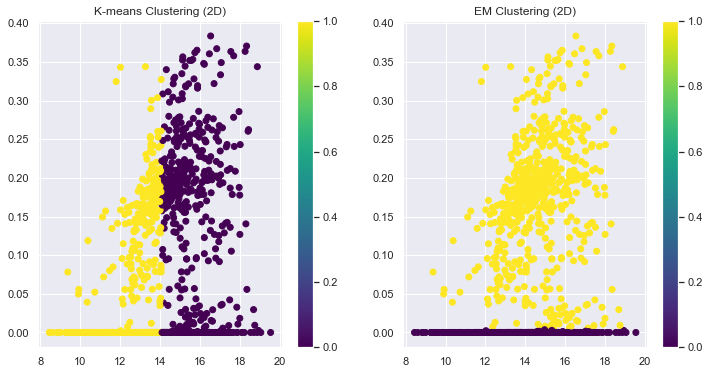

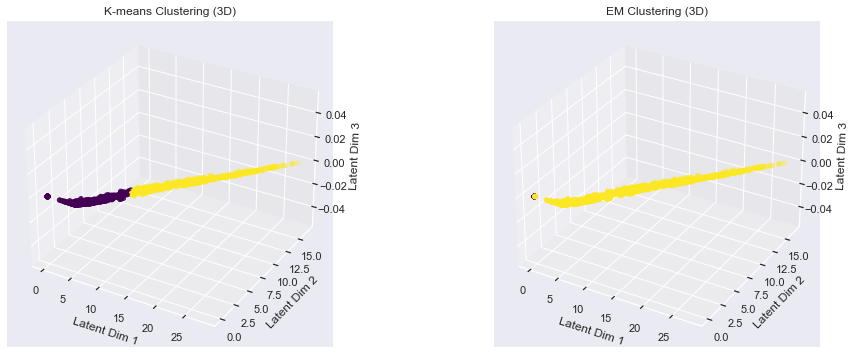

In [128]:
# K-means clustering
kmeans_2d = KMeans(n_clusters=2, random_state=42)
kmeans_3d = KMeans(n_clusters=2, random_state=42)

# EM clustering
gmm_2d = GaussianMixture(n_components=2, random_state=42)
gmm_3d = GaussianMixture(n_components=2, random_state=42)

# Fit models
kmeans_pred_2d = kmeans_2d.fit_predict(latent_train_2d)
kmeans_pred_3d = kmeans_3d.fit_predict(latent_train_3d)

gmm_pred_2d = gmm_2d.fit_predict(latent_train_2d)
gmm_pred_3d = gmm_3d.fit_predict(latent_train_3d)

# Visualize in 2D
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(latent_train_2d[:, 0], latent_train_2d[:, 1], c=kmeans_pred_2d, cmap='viridis')
plt.title('K-means Clustering (2D)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(latent_train_2d[:, 0], latent_train_2d[:, 1], c=gmm_pred_2d, cmap='viridis')
plt.title('EM Clustering (2D)')
plt.colorbar()
plt.show()

# Visualize in 3D
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(latent_train_3d[:, 0], latent_train_3d[:, 1], latent_train_3d[:, 2], c=kmeans_pred_3d, cmap='viridis')
ax1.set_title('K-means Clustering (3D)')
ax1.set_xlabel('Latent Dim 1')
ax1.set_ylabel('Latent Dim 2')
ax1.set_zlabel('Latent Dim 3')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(latent_train_3d[:, 0], latent_train_3d[:, 1], latent_train_3d[:, 2], c=gmm_pred_3d, cmap='viridis')
ax2.set_title('EM Clustering (3D)')
ax2.set_xlabel('Latent Dim 1')
ax2.set_ylabel('Latent Dim 2')
ax2.set_zlabel('Latent Dim 3')

plt.show()

Finally evaluating the clusters by comparinf the predictions with the true classes:

Since I reduced the number of classifications to two, it was understood as binary classification in the models and values ​​of 0 and 1 were assigned. Therefore, I first arranged the test data as if it were binary classification, so that the values ​​written as 1 were replaced by 1, and the values ​​written as 3 were replaced by 0.

In [134]:
binary_y_test2 = y_test2.copy()
binary_y_test2 = binary_y_test2.replace({1: 1, 3: 0})

Finally, I checked the accuracy rates by comparing the models' predictions with the real values ​​converted to binary classification. Accuracy rates for the models are stated below as printed:

In [138]:
accuracy_km_2d = accuracy_score(binary_y_test2, kmeans_pred_2d)  
accuracy_km_3d = accuracy_score(binary_y_test2, kmeans_pred_3d)  
accuracy_em_2d = accuracy_score(binary_y_test2, gmm_pred_2d)  
accuracy_em_3d = accuracy_score(binary_y_test2, gmm_pred_3d)  
print("Accuracies\naccuracy_km_2d:{}\naccuracy_km_3d:{}\naccuracy_em_2d:{}\naccuracy_em_3d:{}".format(accuracy_km_2d,accuracy_km_3d,accuracy_em_2d,accuracy_em_3d))

Accuracies
accuracy_km_2d:0.29552469135802467
accuracy_km_3d:0.8263888888888888
accuracy_em_2d:0.5192901234567902
accuracy_em_3d:0.6589506172839507
